In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

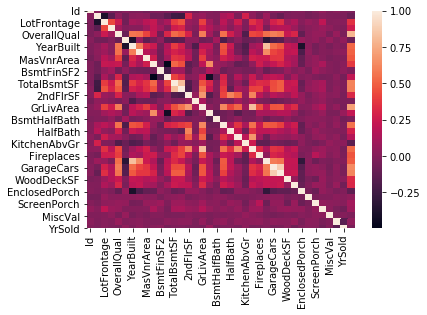

In [2]:
sns.heatmap(train.corr())
drop_cols = ['Fence']
y = train['SalePrice']
train.drop(['SalePrice'],axis=1,inplace=True)

In [3]:
# DROP Columns with lots of NaN
all_datasets=[train , test]
for dataset in all_datasets:
    dataset.drop(columns=drop_cols, inplace=True)

In [4]:
for dataset in all_datasets:
    replace_dict = {"LotShape": {"Reg": 0, "IR1": 1, "IR2":2, "IR3":3}}
    dataset.replace(to_replace=replace_dict, inplace=True)
    replace_dict = {"Utilities" : {"AllPub":3, "NoSewr":2, "NoSeWa": 1, "ELO": 0}}
    dataset.replace(to_replace = replace_dict, inplace=True)
    idx = dataset['Utilities'].isna()
    if any(idx):
        # Replace the NaNs with something
        dataset.loc[idx,'Utilities'] = 0
    replace_dict = {"LandSlope" : {"Gtl":0, "Mod":1, "Sev":2}}
    dataset.replace(to_replace=replace_dict, inplace=True)
    
for dataset in all_datasets:
    idx = dataset['LotFrontage'].isna()
    dataset.loc[idx,'LotFrontage'] = 0
    idx = dataset['Fireplaces'].isna()
    dataset.loc[idx,'Fireplaces'] = 0

for dataset in all_datasets:
    idx2 = dataset['MasVnrType'].isna() 
    idx3 = dataset['MasVnrType']==0
    dataset.loc[idx2,'MasVnrType'] = 'None'
    dataset.loc[idx3,'MasVnrType'] = 'None'
    idx = dataset['MasVnrType'].str.contains('None')
    dataset.loc[idx,'MasVnrArea'] = 0
    
    idx = dataset['MiscFeature'].isna()
    dataset.loc[idx,'MiscFeature'] = 'None'

In [5]:
# Clean data, convert to numericals
for dataset in all_datasets:
    idx = dataset['BsmtQual'].isna()
    dataset.loc[idx,'BsmtQual']=0
    idx = dataset['BsmtCond'].isna()
    dataset.loc[idx,'BsmtCond']=0
    idx = dataset['BsmtExposure'].isna()
    dataset.loc[idx,'BsmtExposure']=0
    idx = dataset['BsmtFinType1'].isna()
    dataset.loc[idx,'BsmtFinType1']=0
    idx = dataset['BsmtFinType2'].isna()
    dataset.loc[idx,'BsmtFinType2']=0
    dataset.replace({'BsmtQual': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    dataset.replace({'BsmtCond': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    dataset.replace({'BsmtExposure': { 'No':1,'Mn':2,'Av':3,'Gd':4}}, inplace=True)
    dataset.replace({'BsmtFinType1': {'Unf':1,'LwQ':2,'Rec':3,'BLQ':4, 'ALQ':5, 'GLQ':6 }}, inplace=True)
    dataset.replace({'BsmtFinType2': { 'Unf':1,'LwQ':2,'Rec':3,'BLQ':4, 'ALQ':5, 'GLQ':6 }}, inplace=True)
    
for dataset in all_datasets:
    dataset.replace({'HeatingQC': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    dataset.replace({'KitchenQual': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    dataset.replace({'ExterQual': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    
    idx = dataset['GarageArea']==0
    dataset.loc[idx,'GarageQual']=0
    dataset.loc[idx,'GarageCond']=0
    dataset.loc[idx,'GarageFinish']=0
    dataset.loc[idx,'GarageType'] = 'None'
    dataset.loc[idx,'GarageYrBlt'] = dataset['GarageYrBlt'].mean()
    dataset.replace({'GarageQual': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    dataset.replace({'GarageCond': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    dataset.replace({'GarageFinish': {'Unf':1, 'RFn':2, 'Fin':3}}, inplace=True)
    dataset.replace({'PavedDrive': {'N': 0, 'P': 1, 'Y': 2}}, inplace=True)
    
    idx = dataset['Functional'].isna()
    dataset.loc[idx,'Functional'] = "Typ"
    dataset.replace({'Functional':{'Sal':0,'Sev':1,'Maj2':2,'Maj1':2,'Mod':3,'Min2':4,'Min1':4,'Typ':5}}, inplace=True)
    
    idx = dataset['Fireplaces']==0
    dataset.loc[idx,'FireplaceQu']=0
    dataset.replace({'FireplaceQu': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    idx = dataset['PoolArea']==0
    dataset.loc[idx,'PoolQC']=0
    dataset.replace({'PoolQC': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    
    dataset.replace({'CentralAir':{'N':0,'Y':1}}, inplace=True)
    dataset.replace({'Electrical':{'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr':4, 'Mix':2.5}}, inplace=True)
    dataset.replace({'Street':{'Grvl':0, 'Pave':1}}, inplace=True)
    idx = dataset['Alley'].isna()
    dataset.loc[idx,'Alley'] = 0
    dataset.replace({'Alley':{'Grvl':1, 'Pave':2}}, inplace=True)
    
for dataset in all_datasets:
    dataset.replace({'SaleType':{'CWD':'WD', 'VWD':'WD', 'ConLw':'Con','ConLI':'Con','ConLD':'Con'}}, inplace=True)


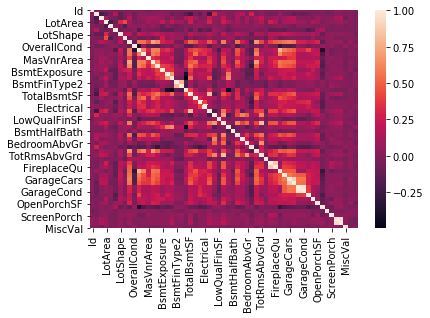

In [6]:
sns.heatmap(train.corr())

In [7]:
train['GarageYrBlt'].mean()

1978.5061638868744